# Alessio Reitano - 0001005384

In [108]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation
from wordcloud import WordCloud,STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer

# Imports for clustering and plot
from plot_silhouette import plot_silhouette
from plot_clusters import plot_clusters
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'movies_tv_shows.csv'
separator = ','
random_state = 43

# Directives
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(random_state)
plt.style.use('ggplot')

In [109]:
#Loading the dataset
df = pd.read_csv(file_name, sep=separator, encoding = "ISO-8859-1") #dataset not in utf-8

In [110]:
df.shape

(12035, 13)

In [111]:
df.columns

Index(['Sl.No', 'Title', 'Description', 'Genres', 'Cast', 'Director',
       'Production Country', 'Added On', 'Year', 'Text8', 'Duration(in Mins)',
       'Season', 'Rating'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No               12034 non-null  float64
 1   Title               12035 non-null  object 
 2   Description         12035 non-null  object 
 3   Genres              12035 non-null  object 
 4   Cast                10533 non-null  object 
 5   Director            9892 non-null   object 
 6   Production Country  150 non-null    object 
 7   Added On            12035 non-null  object 
 8   Year                12034 non-null  float64
 9   Text8               11737 non-null  object 
 10  Duration(in Mins)   10136 non-null  object 
 11  Season              1900 non-null   object 
 12  Rating              937 non-null    object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [113]:
df.describe()

,Sl.No,Year
count,12034.000000,12034.000000
mean,6017.500000,2006.731677
std,3474.060904,22.160818
min,1.000000,1920.000000
25%,3009.250000,2006.000000
50%,6017.500000,2016.000000
75%,9025.750000,2020.000000
max,12034.000000,2022.000000


In [114]:
print('Total duplicate values: {}'.format(df.duplicated().sum()))

Total duplicate values: 0


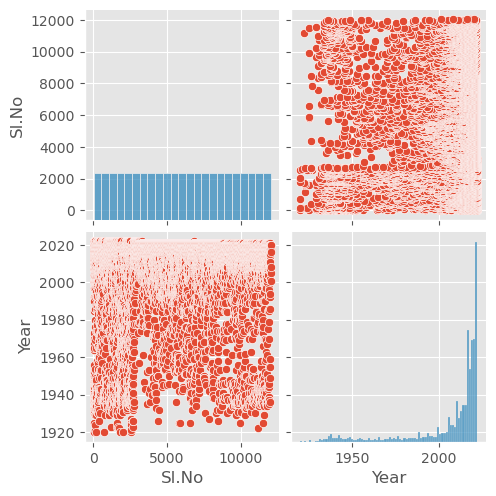

In [115]:
sns.pairplot(df)

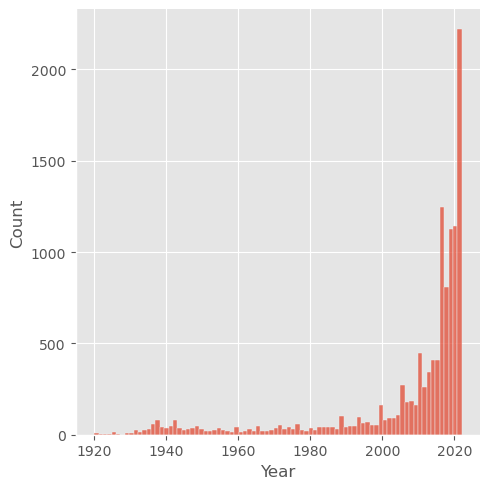

In [116]:
sns.displot(data=df, x = 'Year')

<AxesSubplot:>

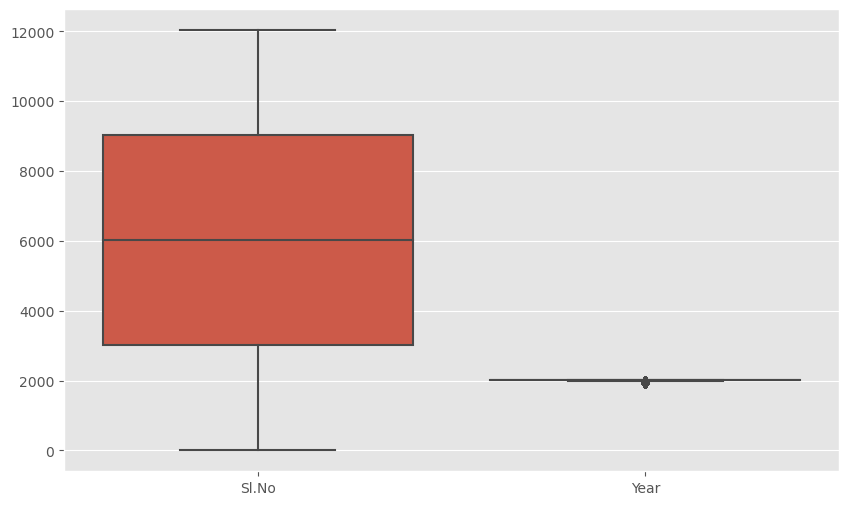

In [117]:
sns.boxplot(data=df)

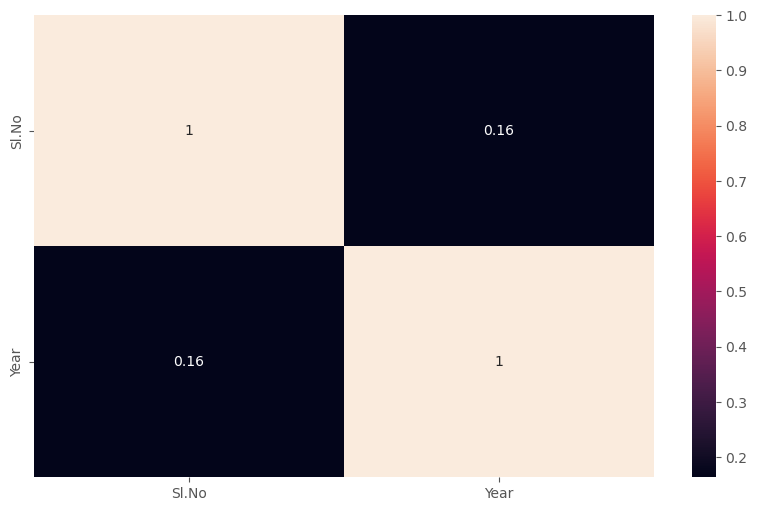

In [118]:
plt.figure()
a=sns.heatmap(df.corr(),annot=True)

In [119]:
df.head()

,Sl.No,Title,Description,Genres,Cast,Director,Production Country,Added On,Year,Text8,Duration(in Mins),Season,Rating
0,1.0,An American Ghost Story,Paul Anderson (Stephen Twardokus) and his girl...,Horror,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,NaN,"June 19, 2022",2012.0,18+,90,NaN,NaN
1,2.0,Back Door to Heaven,"A young kid, who starts out stealing small thi...","Action, Drama","Wallace Ford, Stuart Erwin",William K. Howard,NaN,"June 19, 2022",1939.0,7+,84,NaN,NaN
2,3.0,Big Timers,A wealthy young society man is dating a beauti...,"Arts, Entertainment, and Culture, Comedy","Stepin Fetchit, Francine Everett",Bud Pollard,NaN,"June 19, 2022",1945.0,7+,36,NaN,NaN
3,4.0,Brand of the Devil,Jolley is the leader of the Devil's Brand gang...,Western,"Dave O'Brien, James Newill",Harry L. Fraser,NaN,"June 19, 2022",1944.0,13+,57,NaN,NaN
4,5.0,Come As You Are,Three young men with disabilities (Grant Rosen...,"Comedy, Drama, Romance","Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,NaN,"June 19, 2022",2019.0,18+,107,NaN,NaN


In [120]:
# Analyze the genres of films present in the dataset
genres = df['Genres'].str.split(',').explode().str.strip()
print(genres.value_counts())

Drama                        5042
Comedy                       2926
Action                       2266
Suspense                     1940
Kids                         1209
Horror                       1143
Special Interest             1141
Documentary                  1089
Romance                       873
International                 842
Entertainment                 695
Arts                          695
and Culture                   695
Animation                     653
Science Fiction               544
Adventure                     485
Western                       356
Sports                        213
Music Videos and Concerts     202
Fantasy                       186
Arthouse                      177
TV Shows                      145
LGBTQ                         145
Unscripted                    139
Anime                         102
Young Adult Audience           92
Fitness                        88
Faith and Spirituality         85
Historical                     74
Military and W

In [121]:
# Analyze movie ratings
ratings = df['Rating'].value_counts()
print(ratings)

6.6       37
6.7       37
5.9       33
6.9       32
6.2       32
          ..
Rating     1
3.3        1
2.6        1
2.0        1
2.8        1
Name: Rating, Length: 67, dtype: int64


In [122]:
# Analyze the cast of movies
cast = df['Cast'].str.split(',').explode().str.strip()
print(cast.value_counts())

Maggie Binkley    61
1                 60
Roy Rogers        50
Prakash Raj       38
Gene Autry        37
                  ..
Harry Singh        1
Sudhir Nema        1
Nawab              1
Sanjay Swaraj      1
Andrew Asper       1
Name: Cast, Length: 36890, dtype: int64


In [123]:
# Analyze movie directors
directors = df['Director'].str.split(',').explode().str.strip()
print(directors.value_counts())

Mark Knight              115
Cannis Holder             62
Moonbug Entertainment     41
Joseph Kane               40
Jay Chapman               34
                        ... 
Shree Jayadrath            1
Irene Zoe Alameda          1
Hooroo Jackson             1
PRATIM D. GUPTA            1
Glenn Miller               1
Name: Director, Length: 7384, dtype: int64


In [124]:
# Drop the column
col_to_drop=["Sl.No","Production Country","Added On","Season","Rating"]
df1 = df.drop(col_to_drop,axis=1)

In [125]:
# Drop the value duplicate for Title
df1 = df1.drop_duplicates(["Title"])
print("Duplicates removed")
df1.shape

Duplicates removed


(11384, 8)

In [126]:
df1 = df1.drop_duplicates(["Description"])
print("Duplicates removed")
df1.shape

Duplicates removed


(11024, 8)

In [127]:
df1.nunique()

Title                11024
Description          11024
Genres                 624
Cast                  9211
Director              6820
Year                   102
Text8                   24
Duration(in Mins)      207
dtype: int64

In [128]:
df1.isna().sum()

Title                   0
Description             0
Genres                  0
Cast                 1390
Director             2013
Year                    1
Text8                 281
Duration(in Mins)    1789
dtype: int64

In [129]:
# Drop null values
df1.dropna(inplace=True)

In [130]:
df1.rename(columns={'Text8':'Rating'},inplace=True)

In [131]:
df1["Duration(in Mins)"] = pd.to_numeric(df1["Duration(in Mins)"])

In [132]:
df1.shape

(7921, 8)

In [133]:
# Convert the Title column to lowercase
df1['Title'] = df1['Title'].str.lower()

In [134]:
# Convert the Description column to lowercase
df1['Description'] = df1['Description'].str.lower()

In [135]:
# Convert the Genres column to lowercase
df1['Genres'] = df1['Genres'].str.lower()

In [136]:
# Convert the Cast column to lowercase
df1['Cast'] = df1['Cast'].str.lower()

In [137]:
# Convert the Director column to lowercase
df1['Director'] = df1['Director'].str.lower()

In [138]:
df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,an american ghost story,paul anderson (stephen twardokus) and his girl...,horror,"stephen twardokus, jon gale, liesel kopp, wend...",derek cole,2012.0,18+,90
1,back door to heaven,"a young kid, who starts out stealing small thi...","action, drama","wallace ford, stuart erwin",william k. howard,1939.0,7+,84
2,big timers,a wealthy young society man is dating a beauti...,"arts, entertainment, and culture, comedy","stepin fetchit, francine everett",bud pollard,1945.0,7+,36
3,brand of the devil,jolley is the leader of the devil's brand gang...,western,"dave o'brien, james newill",harry l. fraser,1944.0,13+,57
4,come as you are,three young men with disabilities (grant rosen...,"comedy, drama, romance","grant rosenmeyer, hayden szeto, ravi patel, ga...",richard wong,2019.0,18+,107


In [139]:
df1.dtypes

Title                 object
Description           object
Genres                object
Cast                  object
Director              object
Year                 float64
Rating                object
Duration(in Mins)      int64
dtype: object

In [140]:
rating_count = df1["Rating"].value_counts()
rating_count 

13+         1975
16+         1498
18+         1406
R            941
ALL          511
PG-13        488
7+           473
PG           272
NR           247
G             69
UNRATED       32
NOT_RATE       4
AGES_18_       2
NC-17          2
16             1
Name: Rating, dtype: int64

In [141]:
def mergeRating(i):
    if i in ["G", "ALL", "ALL_AGES"]:
        return 0
    elif i in ["7+"]:
        return 7
    elif i in ["13+", "PG-13"]:
        return 13
    elif i in ["16+", "16"]:
        return 16
    elif i in ["NC-17"]:
        return 17
    elif i in ["18+", "AGES_18_", "R"]:
        return 18
    elif i in ["NR", 'UNRATED', 'NOT_RATE', "PG"]:
        return -1
    return i

df1["Rating"] = df1["Rating"].apply( mergeRating )

df1["Rating"].unique()

array([18,  7, 13, -1,  0, 16, 17])

<AxesSubplot:xlabel='Rating', ylabel='count'>

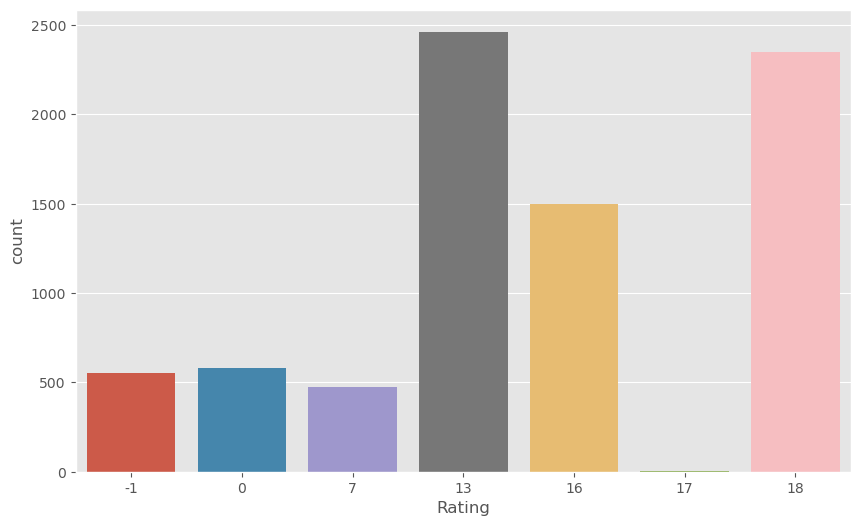

In [142]:
sns.countplot(data=df1, x='Rating') 

In [143]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

#apply the function
df1['Description'] = df1['Description'].apply(remove_punctuation)
df1['Title'] = df1['Title'].apply(remove_punctuation)

In [144]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #Stemmer
    
    stemmer = PorterStemmer()
    
    stemmered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmered_tokens]
    
    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

def preprocess_text2(text):

    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Join the tokens back into a string

    processed_text = ' '.join(filtered_tokens)

    return processed_text

# apply the function

df1['Description'] = df1['Description'].apply(preprocess_text)
df1['Title'] = df1['Title'].apply(preprocess_text)
df1['Genres'] = df1['Genres'].apply(preprocess_text2)

df1['Genres'] = df1['Genres'].str.strip()
df1['Genres'] = df1['Genres'].str.replace(" , ",",")
df1['Genres'] = df1['Genres'].str.replace(", ",",")
df1['Genres'] = df1['Genres'].str.replace(" ,",",")

df1['Director'] = df1['Director'].str.strip()
df1['Director'] = df1['Director'].str.replace(" , ",",")
df1['Director'] = df1['Director'].str.replace(", ",",")
df1['Director'] = df1['Director'].str.replace(" ,",",")

df1['Cast'] = df1['Cast'].str.strip()
df1['Cast'] = df1['Cast'].str.replace(" , ",",")
df1['Cast'] = df1['Cast'].str.replace(", ",",")
df1['Cast'] = df1['Cast'].str.replace(" ,",",")

df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,american ghost stori,paul anderson stephen twardoku girlfriend stel...,horror,"stephen twardokus,jon gale,liesel kopp,wendy h...",derek cole,2012.0,18,90
1,back door heaven,young kid start steal small thing order fit cr...,"action,drama","wallace ford,stuart erwin",william k. howard,1939.0,7,84
2,big timer,wealthi young societi man date beauti young wo...,"arts,entertainment,culture,comedy","stepin fetchit,francine everett",bud pollard,1945.0,7,36
3,brand devil,jolley leader devil brand gang rustler molli d...,western,"dave o'brien,james newill",harry l. fraser,1944.0,13,57
4,come,three young men disabl grant rosenmey hayden s...,"comedy,drama,romance","grant rosenmeyer,hayden szeto,ravi patel,gabou...",richard wong,2019.0,18,107


In [145]:
mlb = MultiLabelBinarizer()

genres = pd.DataFrame(mlb.fit_transform(df1['Genres'].str.split(',')),columns = mlb.classes_, index = df1.index)
director = pd.DataFrame(mlb.fit_transform(df1['Director'].str.split(',')),columns = mlb.classes_, index = df1.index)
cast = pd.DataFrame(mlb.fit_transform(df1['Cast'].str.split(',')),columns = mlb.classes_, index = df1.index)
description = pd.DataFrame(mlb.fit_transform(df1['Description'].str.split()), columns = mlb.classes_, index = df1.index)

In [146]:
def find_top_columns(dataset):
    # Calcola la somma per ogni colonna
    column_sums = dataset.sum(axis=0)
    
    # Crea un dizionario che associa i nomi delle colonne alle somme
    column_dict = {column_name: column_sum for column_name, column_sum in zip(dataset.columns, column_sums)}
    
    # Crea un oggetto Counter per contare le frequenze dei nomi delle colonne
    column_counts = Counter(column_dict)
    
    # Trova i 100 nomi di colonne più frequenti
    top_columns = [column_name for column_name, _ in column_counts.most_common(100)]
    
    # Seleziona le 100 colonne più frequenti e crea una copia del dataset con solo queste colonne
    top_dataset = dataset[top_columns].copy()
    
    # Crea una nuova colonna "altro" con valori 1 se il nome non è tra le 100 colonne più frequenti, altrimenti 0
    top_dataset['Other'] = dataset.apply(lambda row: 1 if row.name not in top_columns else 0, axis=1)
    
    return top_dataset

In [147]:
cast_top_100 = find_top_columns(cast)

In [148]:
director_top_100 = find_top_columns(director)

In [149]:
df2 = pd.concat([df1, description, genres, director_top_100, cast_top_100],axis=1)

In [150]:
df3 = df2.drop(['Genres','Description','Cast','Director'],axis=1)

In [151]:
#Word frequency of Description
freq_description = pd.Series(' '.join(df2['Description']).split()).value_counts()[:20] # for top 20
freq_description

life      1219
love      1148
find      1002
one        991
stori      975
young      893
famili     875
get        824
man        765
live       755
friend     748
take       726
new        722
woman      710
two        698
world      636
becom      620
film       604
murder     602
girl       531
dtype: int64

In [152]:
#Word frequency of Title
freq_title = pd.Series(' '.join(df2['Title']).split()).value_counts()[:20] # for top 20
freq_title

love        141
2           107
stori        81
night        81
christma     70
man          69
live         56
black        55
day          55
girl         55
time         54
last         53
movi         52
kid          52
one          51
life         50
dark         49
littl        48
hous         43
classic      42
dtype: int64

In [153]:
#Word frequency of Genres
freq_genres = pd.Series(' '.join(df2['Genres']).split(',')).value_counts()[:20] # for top 20
freq_genres

drama                     712
entertainment             540
culture                   486
comedy                    485
suspense action           267
suspense drama            231
horror                    224
suspense comedy           190
adventure                 189
drama action              164
international             152
drama drama               148
drama comedy              120
special interest arts     103
romance drama              85
romance action             80
special interest drama     74
international action       74
science fiction            72
suspense arts              71
dtype: int64

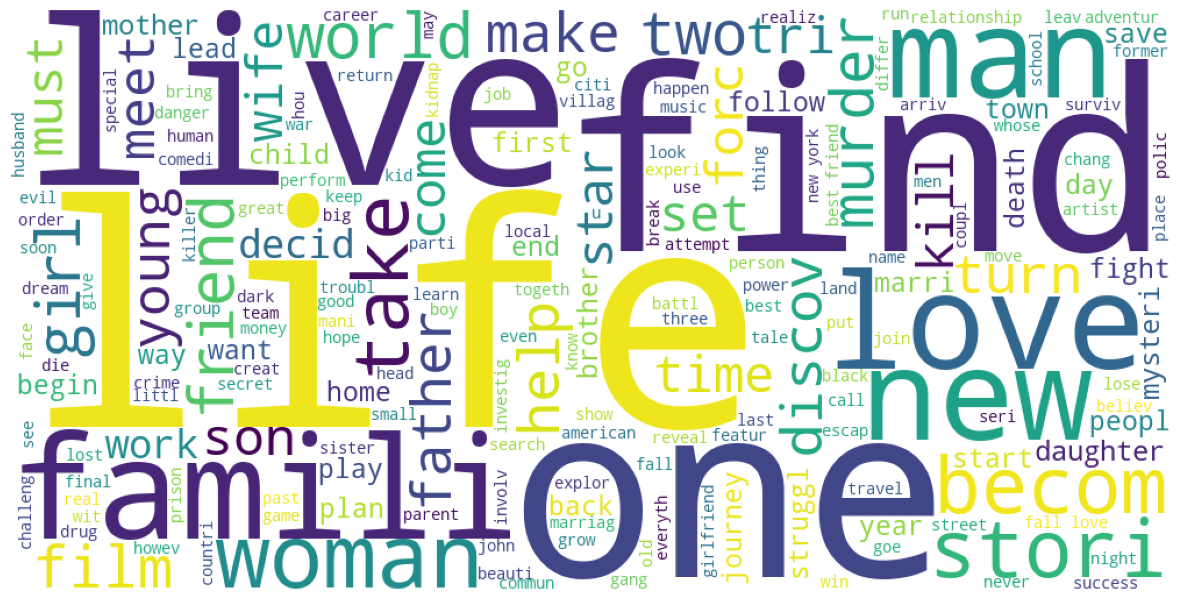

In [154]:
wordcloud_description = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Description']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_description)
plt.axis("off")
plt.show()

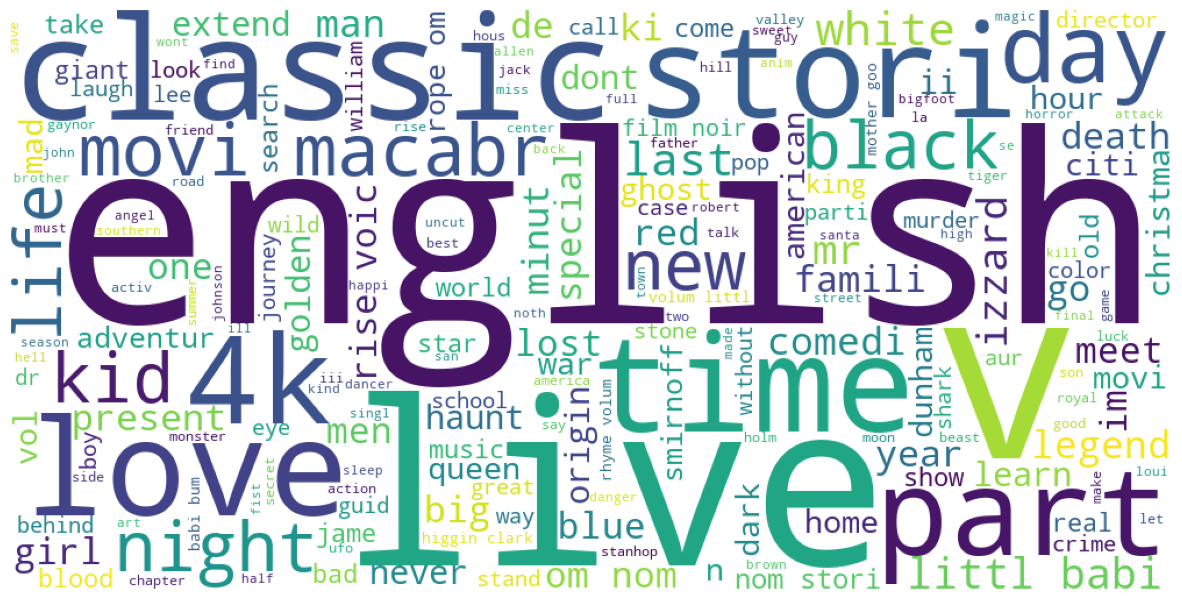

In [155]:
wordcloud_title = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Title']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_title)
plt.axis("off")
plt.show()

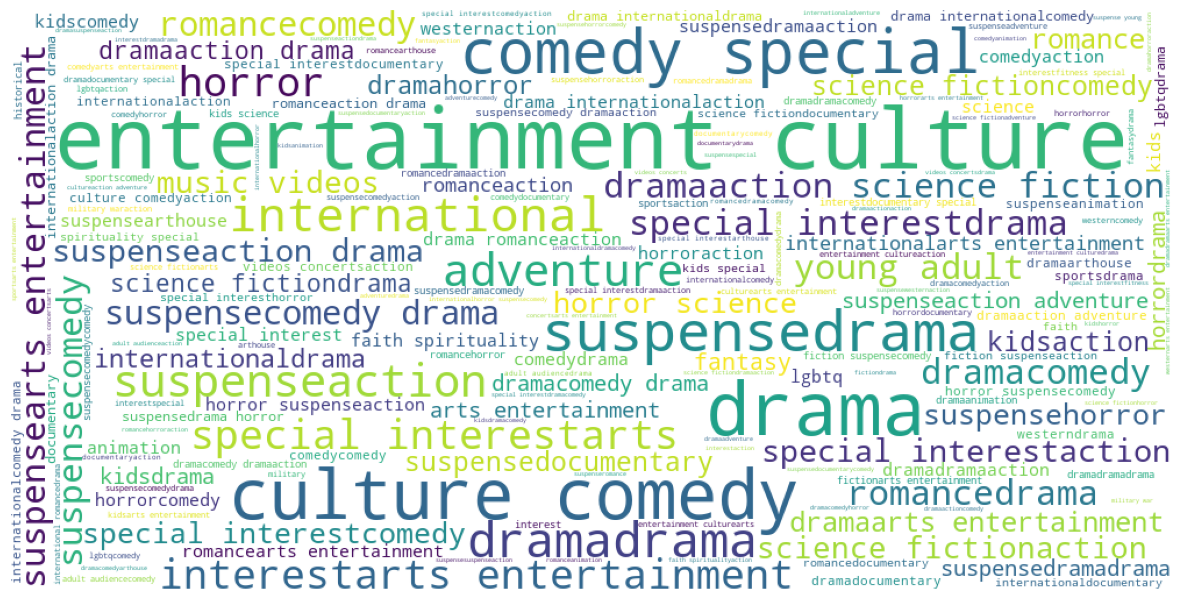

In [156]:
wordcloud_genres = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Genres']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_genres)
plt.axis("off")
plt.show()

In [157]:
df_p = df3.drop(['Title'],axis=1)
df_p.head()

,Year,Rating,Duration(in Mins),0,007,03yr,1,10,100,1000,...,anjali,billy zane,brahmanandam,brian cox,chill wills,christian slater,george cleveland,goundamani,jayaprakash,Other
0,2012.0,18,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1939.0,7,84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1945.0,7,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1944.0,13,57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019.0,18,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
# Range of possible clusters
k_range = range(2,10)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = random_state)
    y_km = km.fit_predict(df_p)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_p,y_km))

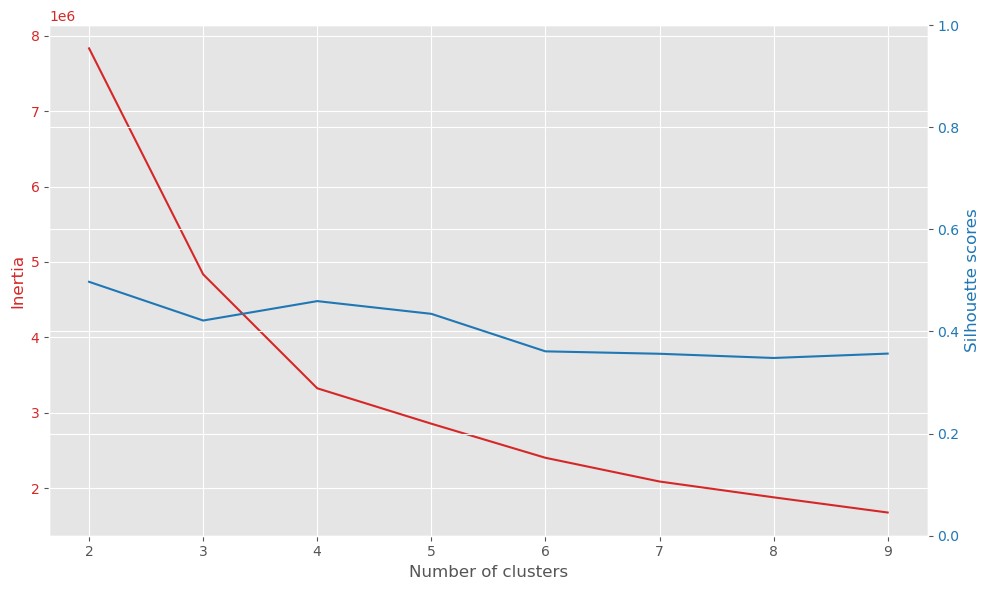

In [159]:
#Plot distortion and silhouette indexes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [182]:
good_k = 4
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
y_km = km.fit_predict(df_p)

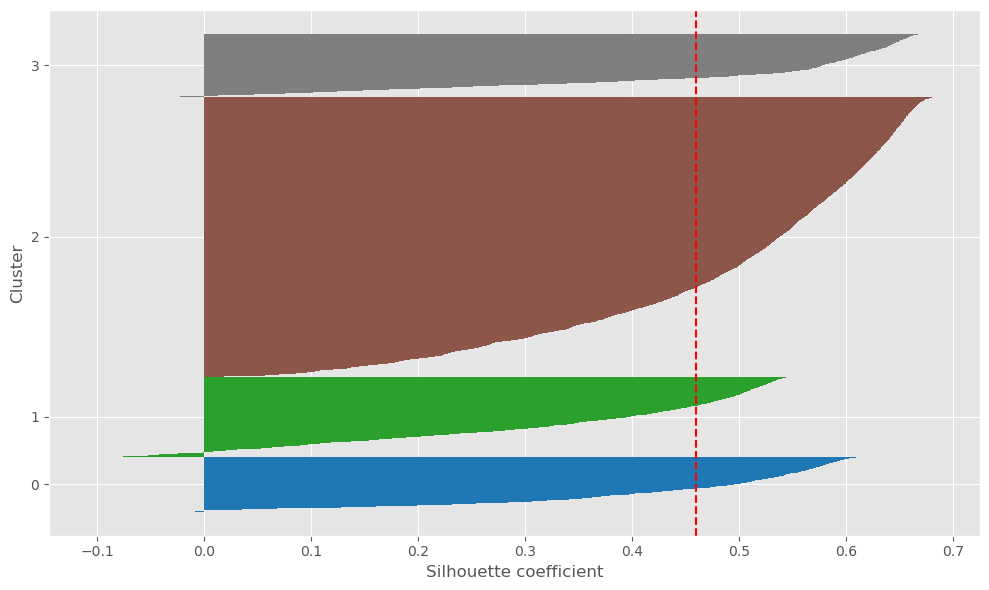

In [196]:
silhouette_vals = silhouette_samples (df_p,y_km, metric = 'euclidean')
plot_silhouette(silhouette_vals,y_km)